# Load data

In [1]:
#from structure_and_load import load
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy.ndimage as spn 

import re
import neo 
import os
import sys

%load_ext autoreload
%autoreload 2

In [2]:
from matlab_file import open

In [3]:
lab_desktop = True

if lab_desktop : 
    session = 't150204001'
    data_path = f'/home/INT/mifsud.l/Bureau/data/Tommy/{session}/modified_data/' #f'~/Bureau/data/Tommy/{session}/modified_data'
    info_path = '/home/INT/mifsud.l/Bureau/Lists&Documentation/TomyCerebusSpikes_Updated_June2023.xlsx'

else : 
    session = 't150204001'
    data_path = f'/home/laurie/Bureau/pattern_classification/data/Tommy_new/{session}/modified_data/'
    info_path = '/home/laurie/Bureau/pattern_classification/data/Tommy_new/session_info.xlsx'

print(f'session : {session}')

session : t150204001


In [4]:
data, load_info = open(data_path)

loading t150204001_probe1_contact23_unit2.mat
loading t150204001_probe1_contact5_unit1.mat
loading t150204001_probe1_contact3_unit1.mat
loading t150204001_probe1_contact1_unit1.mat
loading t150204001_probe2_contact6_unit1.mat
loading t150204001_probe2_contact24_unit1.mat
loading t150204001_probe2_contact10_unit1.mat
loading t150204001_probe2_contact23_unit2.mat
loading t150204001_probe2_contact23_unit1.mat
loading t150204001_probe1_contact11_unit1.mat
loading t150204001_probe1_contact18_unit1.mat
loading t150204001_probe1_contact22_unit2.mat
loading t150204001_probe2_contact7_unit3.mat
loading t150204001_probe1_contact14_unit1.mat
loading t150204001_probe1_contact12_unit1.mat
loading t150204001_probe2_contact20_unit1.mat
loading t150204001_probe2_contact2_unit1.mat
loading t150204001_probe2_contact7_unit4.mat
loading t150204001_probe2_contact17_unit1.mat
loading t150204001_probe2_contact14_unit1.mat
loading t150204001_probe1_contact6_unit1.mat
loading t150204001_probe1_contact2_unit1.m

# Stucture

## info session / units

In [5]:
df = pd.read_excel(info_path)
df.dropna(how='all', inplace=True)
df.drop(columns=['BehDir', 'pitch', 'A/P', 'Lat', 'depth', 'SNR', 'Unnamed: 14', 'depth (no buffer)'], inplace=True)
df.rename(columns={'%Plexon_spike_file' : 'Plexon_spike_file'}, inplace=True)
float_column_names = df.select_dtypes(include=['float']).columns
df[float_column_names] = df[float_column_names].astype(int)

In [6]:
list_prob = []
list_chan = []
list_unit = []

info_units = []

for i in range(len(load_info)) :
    matfile = load_info[i][1]
    # get contact and unit indices from filename
    match_probe = re.search(r'probe(\d+)', matfile)
    match_contact = re.search(r'contact(\d+)', matfile)
    match_unit = re.search(r'unit(\d+)', matfile)

    info_units.append({
        'probe':int(match_probe.group(1)), 
        'contact':int(match_contact.group(1)), 
        'unit':int(match_unit.group(1))})


    list_prob.append(int(match_probe.group(1)))
    list_chan.append(int(match_contact.group(1)))
    list_unit.append(int(match_unit.group(1)))

#info_units = pd.DataFrame(info_units)
sub_info_session = df[df['Plexon_spike_file'].str.startswith(f'{session}')]


info_session = pd.DataFrame()
list_idx = []
for i in range(len(list_unit)):
    sub_data = sub_info_session[(sub_info_session['probe'] == list_prob[i]) & (sub_info_session['channel'] == list_chan[i]) & (sub_info_session['unit'] == list_unit[i])]
    list_idx.append(sub_data.index[0])
    info_session = pd.concat((info_session, sub_data))

In [7]:
def convert_elitrials(entry):
    if pd.notna(entry):  # Check for NaN
        # Remove square brackets and split by space to separate pairs
        pairs = entry.replace('[', '').replace(']', '').split()
        result = []
        for pair in pairs:
            start, end = map(int, pair.split(':'))
            result.append([start, end])
        return result
    else:
        return None
        
info_session['elitrials'] = info_session['elitrials'].apply(convert_elitrials)

In [8]:
info_session

,Plexon_spike_file,probe,channel,unit,start,stop,"SUA (1), MUA (2), unstable (3) few trials (4) or observation (5)",elitrials
179,t150204001_chan_01_24_new,1,23,2,1,8,1,None
161,t150204001_chan_01_24_new,1,5,1,8,11,1,"[[123, 128]]"
159,t150204001_chan_01_24_new,1,3,1,1,11,1,None
156,t150204001_chan_01_24_new,1,1,1,5,8,1,"[[132, 139]]"
187,t150204001_chan_25_48_new,2,6,1,6,9,1,None
208,t150204001_chan_25_48_new,2,24,1,5,8,1,"[[129, 139]]"
193,t150204001_chan_25_48_new,2,10,1,8,11,1,"[[123, 128]]"
207,t150204001_chan_25_48_new,2,23,2,6,11,1,None
206,t150204001_chan_25_48_new,2,23,1,1,3,1,None
166,t150204001_chan_01_24_new,1,11,1,5,8,1,None


In [9]:
first_bloc = info_session['start'].min()
last_bloc = info_session['stop'].max()

print(f'start / stop:\n   {first_bloc} /   {last_bloc}')

tasktime = info_session[(info_session['start'] == first_bloc) & (info_session['stop'] == last_bloc) & (info_session['elitrials'].isna())]
tasktimeComplete = tasktime.shape[0] != 0

if tasktimeComplete :
    unit_info = tasktime[['probe', 'channel', 'unit']].values[0]
    print(f"{tasktime[['start', 'stop', 'elitrials']]} \n\nunit_info : {unit_info}")
    matfile = f'{session}_probe{unit_info[0]}_contact{unit_info[1]}_unit{unit_info[2]}.mat'

    for i in load_info:
        if i[1] == matfile:
            completeUnit = i[0]
            print(f"{i[1]}\n\nunit's loading index = {completeUnit}")

else :
    print('ANY UNIT RECORDED OVER ENTIRE SESSION') 
    print(f"check here to construct session times by hand :\n {info_session['start'] == first_bloc}")

tasktime

start / stop:
   1 /   11
     start  stop elitrials
159      1    11      None 

unit_info : [1 3 1]
t150204001_probe1_contact3_unit1.mat

unit's loading index = 2


,Plexon_spike_file,probe,channel,unit,start,stop,"SUA (1), MUA (2), unstable (3) few trials (4) or observation (5)",elitrials
159,t150204001_chan_01_24_new,1,3,1,1,11,1,None


# Exctract data

In [10]:
# get spike train / periodes times / target info
spike_times = []
task_data = []
target_info = []
target_keys = ['SC1_dir', 'SC2_dir', 'SC3_dir', 'Trial_type']
event_keys_OFF = ['Sel_OFF', 'SC1_OFF', 'SC2_OFF', 'SC3_OFF']


for unit_idx in range(len(data)):
    spike_times.append((load_info[unit_idx], data[unit_idx]['ts']))  

    # List of keys to extract (excluding 'ts', cues direction and times OFF to be constistent with previous results)
    times_keys = [key for key in data[unit_idx] if key != 'ts' and key not in target_keys and key not in event_keys_OFF]
    task_info = {}
    for key_time in times_keys :
        task_info[key_time] = data[unit_idx][key_time]
    task_data.append((load_info[unit_idx],task_info))

    target_ = {}
    for key_target in target_keys :
        target_[key_target] = data[unit_idx][key_target]
    target_info.append((load_info[unit_idx], target_))

    event_labels = list(task_data[0][1].keys())


print(f'spike train sample : {spike_times[0][1]}\nevents : {event_labels}\ntargets : {target_info[0][1].keys()}')

spike train sample : [    237    2137    3267 ... 3657198 3657250 3658579]
events : ['Touch_time', 'Sel_ON', 'SC1_ON', 'SC2_ON', 'SC3_ON', 'Go_time', 'Target_time']
targets : dict_keys(['SC1_dir', 'SC2_dir', 'SC3_dir', 'Trial_type'])


# Time formating

In [11]:
# get event times by trial for each neuron
def events(task_data):
    """
    Retrieves event times from task data file sorts them for each unit

    Args:
    - task_data (list): List of tuples where each tuple contains file information and a dictionary of task-related data.

    Returns:
    - event_times (list of numpy.ndarray): List of arrays containing event times.

    Example usage:
    - event_labels, event_times, event_times_vector = event_times(task_data)
    """

    # Get event times by event labels
    event_times = []
    for unit_idx in range(len(task_data)):
        times = []
        for event in event_labels:
            times.append(task_data[unit_idx][1][event])
        event_times.append((task_data[unit_idx][0], np.array(times, dtype=object)))

    return event_times

event_times = events(task_data)

In [12]:
# reshape times by trials / periods for each neuron + Neo format
from neo.core import Event
from quantities import s 
from quantities import millisecond as ms

def events_by_trial(event_times, event_labels):
    '''
    Structure periods timestamps by trial and store in a data frame.

    Args:
    - event_times (numpy.ndarray): Array of event times where rows represent events, and columns represent trials.
    - event_labels (list): List of event labels corresponding to the columns of the data frame.

    Returns:
    - trials_ts (list of numpy.ndarray): List of event times structured by trial.
    - df_task_ts (list of pandas.DataFrame): List of data frames containing event times structured by trial.
    - events (list of list): List of Event objects.

    '''
    trials_ts = []  # List to store event times structured by trial
    df_task_ts_by_neuron = []  # List to store data frames containing event times structured by trial
    events = []  # List to store Event objects

    for unit_idx in range(len(event_times)):
        n_events = event_times[unit_idx][1].shape[0]
        n_trials = event_times[unit_idx][1].shape[1]

        events_ts = np.zeros((n_trials, n_events), dtype=int)
        event_list = []

        # Split time stamps for each period according to the trial
        for trial in range(n_trials):
            for event in range(n_events):
                events_ts[trial][event] = event_times[unit_idx][1][event][trial]
            
            event_list.append(Event(events_ts[trial] * ms, labels=event_labels, dtype='U'))

        events.append((event_times[unit_idx][0], event_list))
        trials_ts.append((event_times[unit_idx][0], events_ts))
        task_ts = pd.DataFrame(events_ts, columns=event_labels)
        df_task_ts_by_neuron.append((event_times[unit_idx][0], task_ts))

    return trials_ts, df_task_ts_by_neuron, events

trials_ts, df_task_ts_by_neuron, events = events_by_trial(event_times, event_labels)

unit_ = 6
trial_ = 0
print(f'times as list : {trials_ts[unit_][1][trial_]}')
print(f'times as neo events : {events[unit_][1][trial_].times}')
df_task_ts_by_neuron[unit_][1].head()

times as list : [2330253 2331358 2332679 2334014 2335349 2336647 2337168]
times as neo events : [2330253. 2331358. 2332679. 2334014. 2335349. 2336647. 2337168.] ms


,Touch_time,Sel_ON,SC1_ON,SC2_ON,SC3_ON,Go_time,Target_time
0,2330253,2331358,2332679,2334014,2335349,2336647,2337168
1,2465671,2466748,2468070,2469378,2470700,2472002,2472665
2,2475949,2477014,2478323,2479631,2480952,2482238,2482998
3,2716143,2717230,2718548,2719869,2721191,2722476,2723130
4,2758148,2759224,2760533,2761854,2763176,2764460,2765104


# Compute

In [13]:
total_trial_task = trials_ts[completeUnit][1].shape[0]
df_task_ts = pd.DataFrame(trials_ts[completeUnit][1], columns=event_labels, index=np.arange(0, total_trial_task))
df_task_ts.tail()

,Touch_time,Sel_ON,SC1_ON,SC2_ON,SC3_ON,Go_time,Target_time
171,3427744,3428813,3430132,3431440,3432749,3434034,3434577
172,3488819,3489885,3491206,3492515,3493823,3495121,3495791
173,3498993,3500111,3501419,3502727,3504049,3505334,3506030
174,3518800,3519868,3521190,3522498,3523823,3525133,3525652
175,3534627,3535700,3537009,3538317,3539639,3540937,3541739


## units labels

In [14]:
info_units_df = pd.DataFrame(info_units)
count_unitProbe = list(info_units_df['probe'].value_counts(sort=False))

n_units = len(spike_times)
n_event = event_labels[:-1]

unit_label = []
unit_labelProbe1 = []
unit_labelProbe2 = []

for i in range(n_units):
    label = str(\
        'P' + str(info_units[i]['probe']) \
        + '-' + str(info_units[i]['contact']) \
        + '-' + str(info_units[i]['unit'])) 
    unit_label.append(label)

    if info_units[i]['probe'] == 1 :
        unit_labelProbe1.append(label)
    else : 
        unit_labelProbe2.append(label)

print(len(unit_labelProbe1) == count_unitProbe[0])
print(len(unit_labelProbe2) == count_unitProbe[1])
unit_labelTwoprobes = unit_label

True
True


#  Trials ref 

In [15]:
n_neurons = len(spike_times)
n_trials = df_task_ts.shape[0]
n_events = df_task_ts.shape[1] - 1 

In [16]:
for unit in range(n_units) :
    list_idx_trial = []
    times_unit = df_task_ts_by_neuron[unit][1]
    n_trials_unit = times_unit.shape[0]

    for trial in range(n_trials_unit):

        for i, event in enumerate(event_labels[:-1]):
            #print(f'trial :{trial}')            
            t_start = times_unit.loc[trial][f'{event}']
            t_stop = times_unit.loc[trial][f'{event_labels[i+1]}']
            idx_trial = df_task_ts[df_task_ts[f'{event}'] == t_start].index[0]

        list_idx_trial.append(idx_trial)
    df_task_ts_by_neuron[unit][1].insert(0, 'idx_ref_trial', list_idx_trial)


# Spike times formating (alignement, nan for invalid trials)

In [17]:
# get spike by trial for each neuron + Neo format (SpikeTrain)
from neo.core import SpikeTrain

def spike_ts_trial(n_neurons, trials_ts, spike_times):  
    '''split the spike time vector by trial RUN WITH EVENT TIMES NOT ALIGNED'''

    spk_trials = []
    spike_train = []
    

    for unit_idx in range(n_neurons):
        spk_trials.append([])
        spike_train.append([])

        n_trials = trials_ts[unit_idx][1].shape[0]

        for trial in range(n_trials):
            # define the start and end time of each trial
            t_start = trials_ts[unit_idx][1][trial,0]
            t_stop = trials_ts[unit_idx][1][trial,-1]
            
            # get spikes between start and end of trial 
            spk_tmp = spike_times[unit_idx][1] 
            sel_spk = np.logical_and(spk_tmp>t_start, spk_tmp<t_stop)
            
            # for trials without spikes 
            if spk_tmp[sel_spk].shape[0] == 0:
                spk_trials[unit_idx].append([])
                spike_train[unit_idx].append([])

            else :
                spk_ts_trial = SpikeTrain(spk_tmp[sel_spk]*ms, t_start=t_start, t_stop=t_stop, dtype='int32')
                # fill the matrice with spike times aligned to 0
                spike_train[unit_idx].append(spk_ts_trial)

    return spk_trials, spike_train
    

spk_trials, spike_train_trial = spike_ts_trial(n_neurons, trials_ts, spike_times)

In [18]:
'''split the spike time vector by trial RUN WITH EVENT TIMES NOT ALIGNED'''

def align_trials(df_task_ts, df_task_ts_by_neuron, spike_times):
    n_units = len(spike_times)

    for unit_idx in range(n_units):
        data = df_task_ts_by_neuron[unit_idx][1]
        list_trials_unit = list(data['idx_ref_trial'])

        nan_trials = [item for item in list_trials_task if item not in list_trials_unit]
        valid_trials = [item for item in list_trials_task if item in list_trials_unit]

        for idx_trial_valid, trial_valid in enumerate(valid_trials):
            # define the start and end time of each trial
            t_start = data.loc[idx_trial_valid][1]
            t_stop = data.loc[idx_trial_valid][-1]

            # get spikes between start and end of trial and align to zero
            spk_tmp = spike_times[unit_idx][1]
            sel_spk = np.logical_and(spk_tmp>t_start, spk_tmp<t_stop)
            spikes_times_aligned_ = []
                    
            for spk_idx, spk in enumerate(spk_tmp[sel_spk]):
                spk_aligned = spk - t_start
                spikes_times_aligned_.append(spk_aligned)
                        
            spikes_times_aligned[unit_idx][trial_valid]= {
                        'unit_label': unit_label[unit_idx], 
                        'trial_unit' : trial_valid, 
                        't_start_ref' : t_start,
                        't_start_aligned' : t_start - t_start,
                        't_stop_aligned': t_stop - t_start,
                        'spike_time' : np.array(spikes_times_aligned_, dtype=np.int32), 
                        'spike_train' : spike_train_trial[unit_idx][idx_trial_valid]
                        }

        for idx_trial_nan in (nan_trials):
            t_start_nan = df_task_ts.loc[idx_trial_nan][0]
            t_stop_nan = df_task_ts.loc[idx_trial_nan][-1]


            spikes_times_aligned[unit_idx][idx_trial_nan] = {
                        'unit_label': unit_label[unit_idx], 
                        'trial_unit' : idx_trial_nan, 
                        't_start_ref' : t_start_nan, 
                        't_start_aligned' : t_start_nan - t_start_nan,
                        't_stop_aligned': t_stop_nan - t_start_nan,
                        'spike_time' : np.zeros(1, dtype=np.int64),
                        'spike_train' :  np.zeros(1, dtype=np.int64)
                        }

    return spikes_times_aligned
    
list_trials_task = list(df_task_ts.index)
spikes_times_aligned = np.zeros((n_neurons, n_trials), dtype=object)
spikes_times_aligned = align_trials(df_task_ts, df_task_ts_by_neuron, spike_times)


/tmp/ipykernel_6294/3040918305.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  t_start = data.loc[idx_trial_valid][1]
/tmp/ipykernel_6294/3040918305.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  t_stop = data.loc[idx_trial_valid][-1]
/tmp/ipykernel_6294/3040918305.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  t_start_nan = df_task_ts.loc[idx_trial_nan][0]
/tmp/ipykernel_6294/3040918305.py:39: FutureWarning: Series

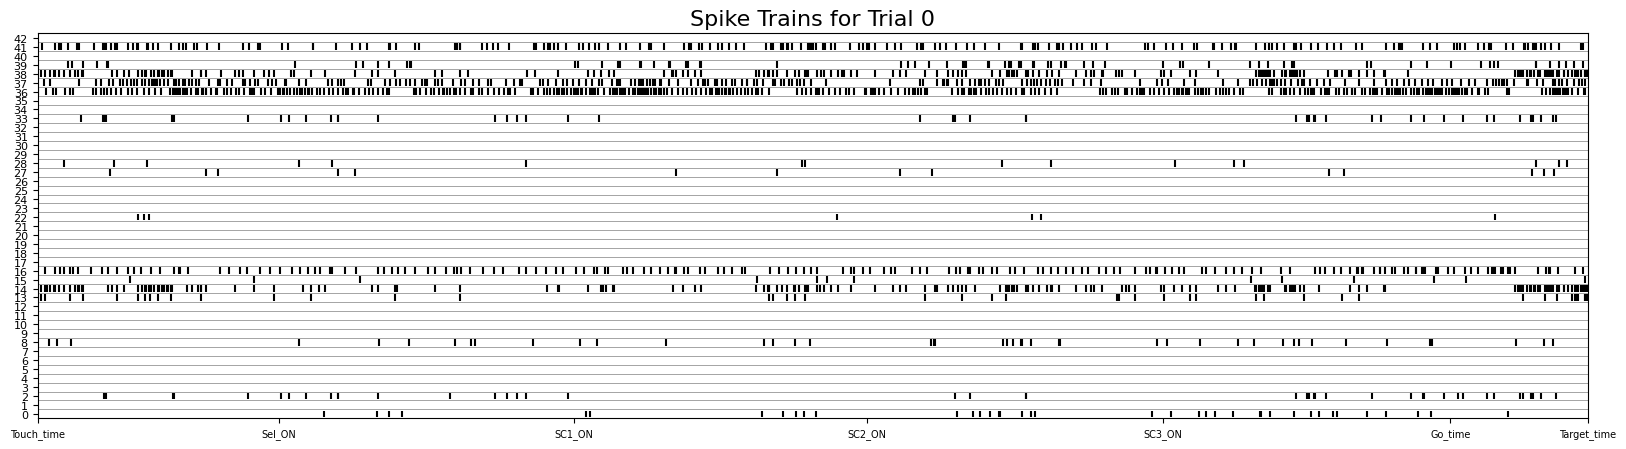

In [252]:
t = 0
event_vector = df_task_ts.loc[t]

plt.figure(figsize=(20, 5))  # Ajustez la taille de la figure selon vos besoins

# Parcourir tous les neurones et tracer leur spike train
for n in range(n_neurons): 
    spiketrain = spikes_times_aligned[n][t]['spike_train']
    if len(spiketrain) > 0 and spiketrain[0] != 0:      
        plt.eventplot(spiketrain.magnitude, linelengths=0.75, lineoffsets=n, color='black')
for i in range(n_neurons - 1):
    plt.hlines(i+0.5, xmin=event_vector.min(), xmax=event_vector.max(), colors='gray', linestyles='solid', linewidth=0.5)

# Définir les étiquettes de l'axe x et l'axe y
plt.xticks(event_vector.values, event_labels, fontsize=7)
plt.yticks(range(n_neurons), [f"{i}" for i in range(n_neurons)], fontsize=8)
plt.title(f"Spike Trains for Trial {t}", fontsize=16)

# Ajuster les limites des axes
plt.xlim(event_vector.min(), event_vector.max())
plt.ylim(-0.5, 42.5)

plt.show()


# ISI Draft

## For one Trial

def compute_isi(x, y):
    x_isi = np.diff(x)
    y_isi = np.diff(y)

    return x_isi, y_isi

n_neurons_ = 2 
n_trials_ = 1
n_times = spikes_times_aligned[n][121]['t_stop']

for n in range(2 - 1):
    spiketrain1 = spikes_times_aligned[n][121]['spike_time']
    spiketrain2 = spikes_times_aligned[n+1][121]['spike_time']

    x_isi, y_isi = compute_isi(spiketrain1, spiketrain2)
    #time = np.zeros(spikes_times_aligned[n][121]['t_stop'])
    x_isi_in_time = np.zeros(n_times)
    y_isi_in_time = np.zeros(n_times)

    for ts_idx, ts in enumerate(spiketrain1[:-1]): 
        x_isi_in_time[ts : ts + x_isi[ts_idx]] = x_isi[ts_idx]

    for ts_idx, ts in enumerate(spiketrain2[:-1]): 
        y_isi_in_time[ts : ts + y_isi[ts_idx]] = y_isi[ts_idx]


    I_isi = np.zeros(n_times)

    for t in range(n_times) :
        x_t = x_isi_in_time[t]
        y_t = y_isi_in_time[t]

        if x_t == 0 and y_t == 0:
            I_isi[t] =  0  

        elif x_t == 0 and y_t > 0: 
            I_isi[t] =  -1

        elif x_t > 0 and y_t == 0: 
            I_isi[t] =  1

        elif x_t <= y_t :
            I_isi[t] =  x_t / y_t - 1

        else:
            I_isi[t] = - (y_t / x_t - 1) 
        


print(spiketrain1)
print(x_isi)
plt.figure()
plt.plot(x_isi_in_time)
plt.plot(y_isi_in_time)
plt.figure()
plt.plot(I_isi)
plt.ylim(-1.1, 1.1)

## For two trials 

mask_tri = np.tri(n_units, n_units, -1, dtype=bool)

neuron1 = np.repeat(np.arange(n_units).reshape([-1,1]), n_units, axis=1)
neuron2 = np.repeat(np.arange(n_units).reshape([1,-1]), n_units, axis=0)

neuron1 = neuron1[mask_tri]
neuron2 = neuron2[mask_tri]

for unit in range(len(neuron1)) :
    n1 = neuron1[unit]
    n2 = neuron2[unit]

I_isi = np.zeros((n_trials, n_units, n_units), dtype=object)

for t in range(2):
    print(f'trial : {t}')
    n_times = spikes_times_aligned[0][t]['t_stop']
    i_isi = np.zeros((n_units, n_units, n_times))

    for n1 in range(n_units):
        print(f'neurone 1 : {n1}')
        spiketrain1 = spikes_times_aligned[n1][t]['spike_time']
        
        for n2 in range(n_units):
            spiketrain2 = spikes_times_aligned[n2][t]['spike_time']

            x_isi, y_isi = compute_isi(spiketrain1, spiketrain2)
            #time = np.zeros(spikes_times_aligned[n][121]['t_stop'])
            x_isi_in_time, y_isi_in_time = np.zeros(n_times), np.zeros(n_times)

            for ts_idx, ts in enumerate(spiketrain1[:-1]): 
                x_isi_in_time[ts : ts + x_isi[ts_idx]] = x_isi[ts_idx]

            for ts_idx, ts in enumerate(spiketrain2[:-1]): 
                y_isi_in_time[ts : ts + y_isi[ts_idx]] = y_isi[ts_idx]


            for time in range(n_times) :
                x_t = x_isi_in_time[time]
                y_t = y_isi_in_time[time]

                if x_t == 0 and y_t == 0:
                    i_isi[n1, n2, time] =  0  

                elif x_t == 0 and y_t > 0: 
                     i_isi[n1, n2, time] =  -1

                elif x_t > 0 and y_t == 0: 
                     i_isi[n1, n2, time] =  1

                elif x_t <= y_t :
                    i_isi[n1, n2, time] =  x_t / y_t - 1

                else:
                     i_isi[n1, n2, time] = - (y_t / x_t - 1) 
                

            I_isi[t, n1, n2] = i_isi[n1, n2, :]


# ISI updated 

In [20]:
from synchrony import IS1I

In [138]:
X_isi_ = np.zeros((n_trials), dtype=object)

In [139]:
X_isi

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=object)

In [160]:
row, col = np.triu_indices(n_units, k=1)
n_pairs = len(row)
ISI_distance = []
X_isi = []

for t in range(n_trials) : 
    n_times = spikes_times_aligned[0][t]['t_stop_aligned']
    X_isi_one_trial = np.zeros((n_units, n_times))
    for n in range(n_units) :
        x_isi = ISI.compute(spikes_times_aligned[n][t]) 
        X_isi_one_trial[n, :] = x_isi

    ISI_distance_one_trials = np.zeros((n_pairs, n_times))
    for n_p, (r,c) in enumerate(zip(row, col)):
        ISI_distance_one_trials[n_p,:] = ISI.distance(X_isi_one_trial[r, :], X_isi_one_trial[c, :])
    
    1
    X_isi.append(X_isi_one_trial)
    ISI_distance.append(ISI_distance_one_trials)

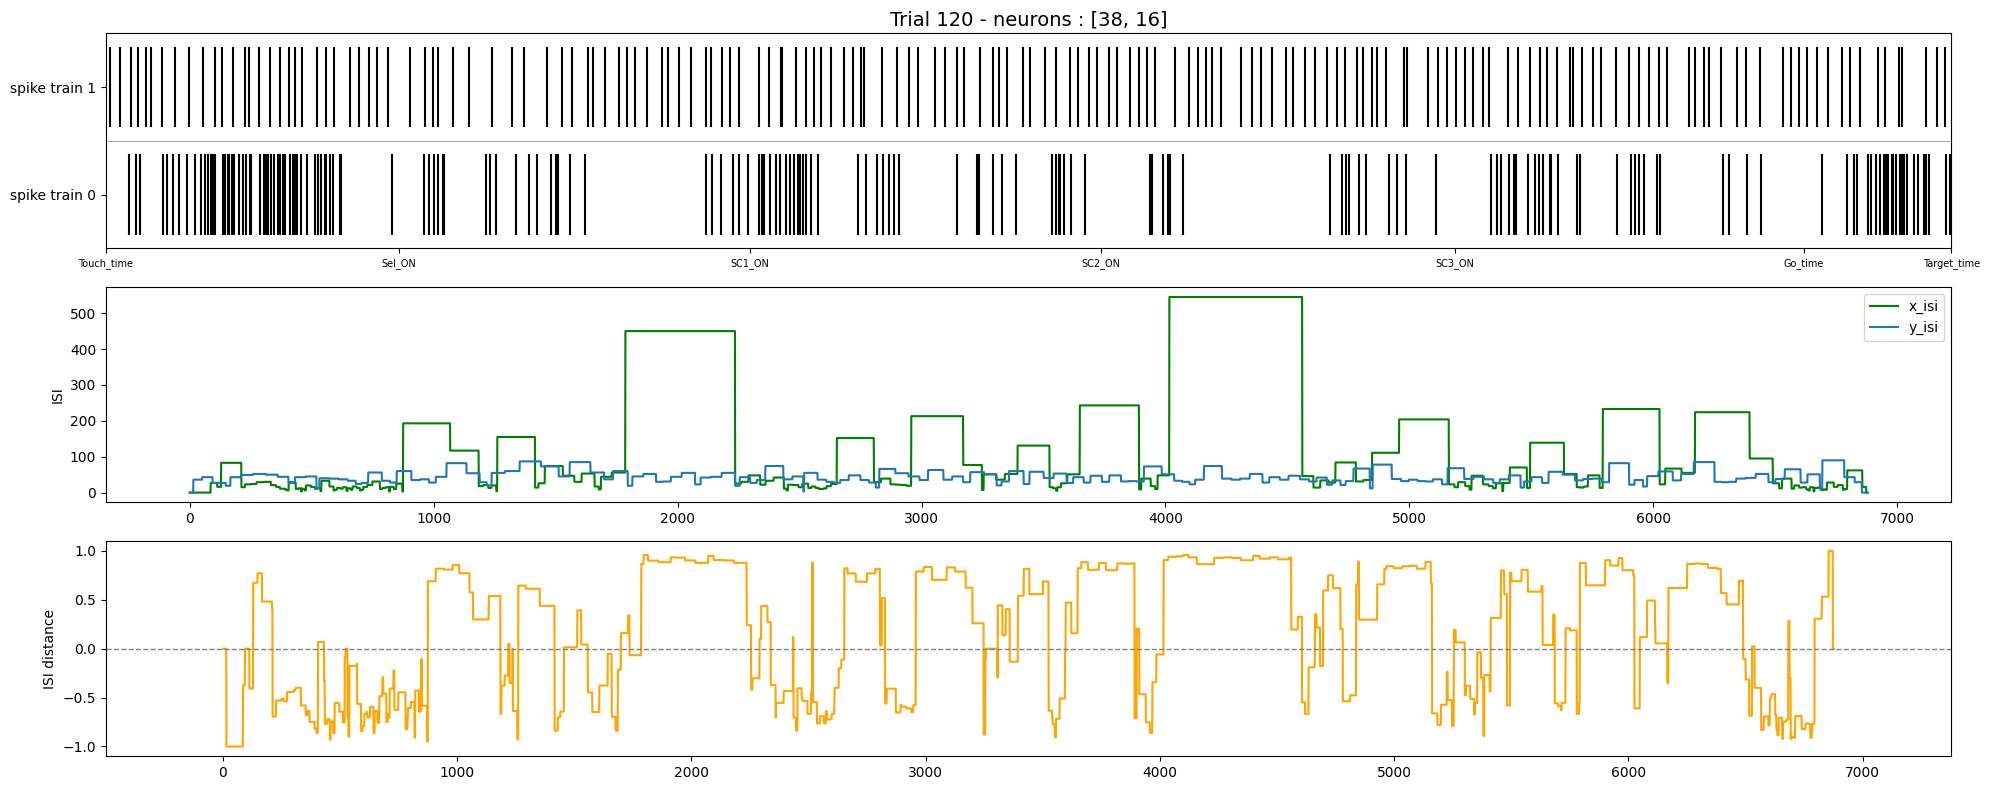

In [161]:
t = 120
neurons_ = [38,16]
event_vector = df_task_ts.loc[t]

fig, axs = plt.subplots(3,1, figsize=(20, 8))

# Parcourir tous les neurones et tracer leur spike train
for idx, n in enumerate(neurons_) : 
    spiketrain = spikes_times_aligned[n][t]['spike_train']
    if len(spiketrain) > 0 and spiketrain[0] != 0:      
        axs[0].eventplot(spiketrain.magnitude, linelengths=0.75, lineoffsets=idx, color='black')
for i in range(len(neuro1ns_) - 1):
    axs[0].hlines(i+0.5, xmin=event_vector.min(), xmax=event_vector.max(), colors='gray', linestyles='solid', linewidth=0.5)

# Définir les étiquettes de l'axe x et l'axe y
axs[0].set_xticks(event_vector.values)
axs[0].set_xticklabels(event_labels, fontsize=7)
axs[0].set_yticks(range(n_neurons))
axs[0].set_yticklabels([f"spike train {i}" for i in range(n_neurons)], fontsize=10)
axs[0].set_title(f"Trial {t} - neurons : {neurons_}", fontsize=14)

# Ajuster les limites des axes
axs[0].set_xlim(event_vector.min(), event_vector.max())
axs[0].set_ylim(-0.5, len(neurons_)-0.5)


x_isi_in_time = ISI.compute(spikes_times_aligned[neurons_[0]][t])
y_isi_in_time = ISI.compute(spikes_times_aligned[neurons_[1]][t]) 
ISI_distance_ = ISI.distance(x_isi_in_time, y_isi_in_time)


# Create a figure with two subplots
# Plot x_isi and y_isi in the first column
axs[1].plot(x_isi_in_time, color = 'green', label='x_isi')
axs[1].plot(y_isi_in_time, label='y_isi')
axs[1].set_ylabel('ISI', fontsize=10)
axs[1].legend()

# Plot isi_dist in the second column
axs[2].plot(ISI_distance_, color='orange')
axs[2].set_ylabel('ISI distance', fontsize=10)
axs[2].hlines(0, xmin=-500, xmax=ISI_distance_.shape[0]+ 500, colors='gray', linestyles='dashed', linewidth=1)
axs[2].set_xlim(-500, ISI_distance_.shape[0] + 500)  # Set x-axis limits

plt.tight_layout()

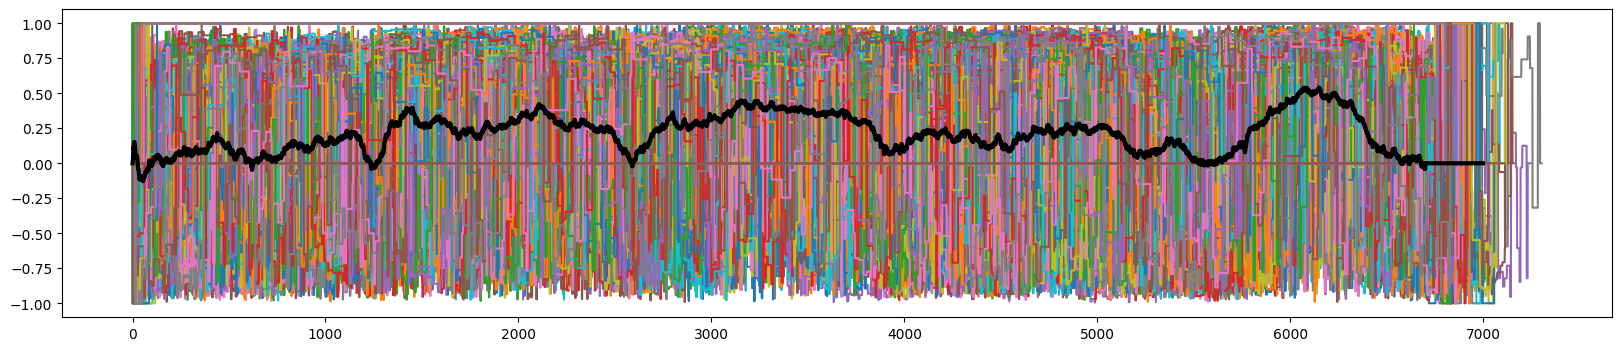

In [162]:
plt.figure(figsize=(20, 4))
ISI_dist_mean = np.zeros([7000])
for t in range(n_trials):
  x_isi_in_time = ISI.compute(spikes_times_aligned[neurons_[0]][t])
  y_isi_in_time = ISI.compute(spikes_times_aligned[neurons_[1]][t]) 
  ISI_distance_ = ISI.distance(x_isi_in_time, y_isi_in_time)
  ISI_dist_mean[:6700] += ISI_distance_[:6700]

  plt.plot(ISI_distance_)  
plt.plot(ISI_dist_mean/n_trials, linewidth=3, c='k') 

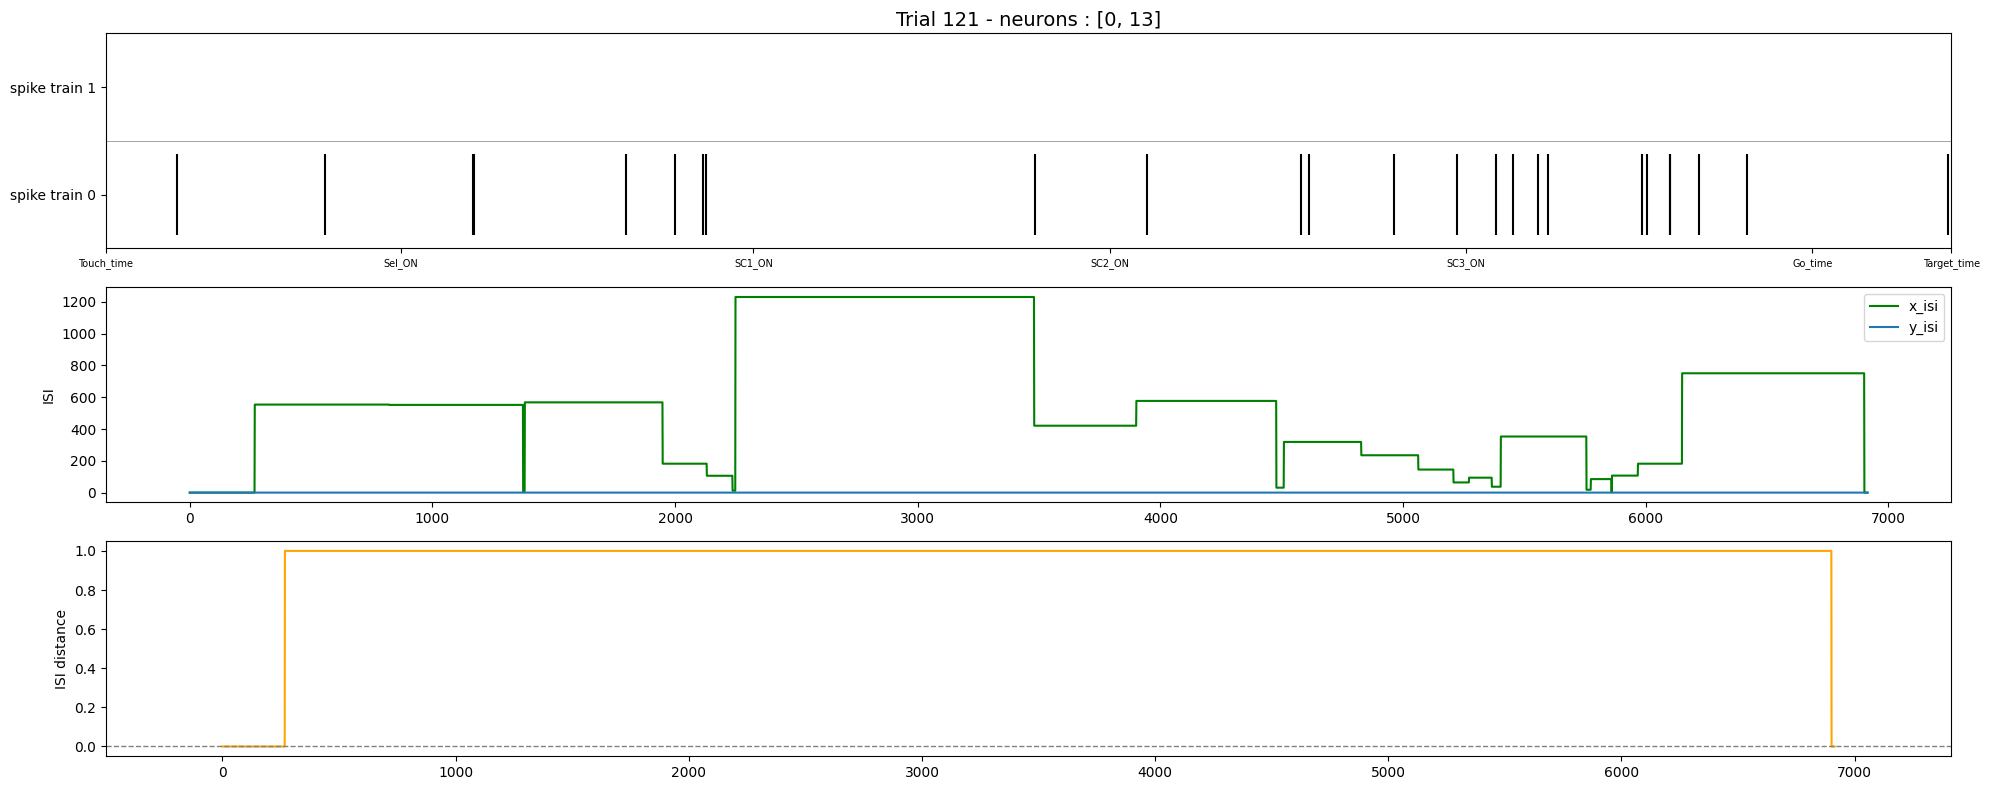

In [163]:
t = 121
neurons_ = [0,13]
event_vector = df_task_ts.loc[t]

fig, axs = plt.subplots(3,1, figsize=(20, 8))

# Parcourir tous les neurones et tracer leur spike train
for idx, n in enumerate(neurons_) :
    spiketrain = spikes_times_aligned[n][t]['spike_train']

    if len(spiketrain) > 0 and spiketrain[0] != 0:      
        axs[0].eventplot(spiketrain.magnitude, linelengths=0.75, lineoffsets=idx, color='black')
for i in range(len(neurons_) - 1):
    axs[0].hlines(i+0.5, xmin=event_vector.min(), xmax=event_vector.max(), colors='gray', linestyles='solid', linewidth=0.5)

# Définir les étiquettes de l'axe x et l'axe y
axs[0].set_xticks(event_vector.values)
axs[0].set_xticklabels(event_labels, fontsize=7)
axs[0].set_yticks(range(n_neurons))
axs[0].set_yticklabels([f"spike train {n}" for n in range(n_neurons)], fontsize=10)
axs[0].set_title(f"Trial {t} - neurons : {neurons_}", fontsize=14)

# Ajuster les limites des axes
axs[0].set_xlim(event_vector.min(), event_vector.max())
axs[0].set_ylim(-0.5, len(neurons_)-0.5)


x_isi_in_time = ISI.compute(spikes_times_aligned[neurons_[0]][t])
y_isi_in_time = ISI.compute(spikes_times_aligned[neurons_[1]][t]) 
ISI_distance_ = ISI.distance(x_isi_in_time, y_isi_in_time)


# Create a figure with two subplots
# Plot x_isi and y_isi in the first column
axs[1].plot(x_isi_in_time, color = 'green', label='x_isi')
axs[1].plot(y_isi_in_time, label='y_isi')
axs[1].set_ylabel('ISI', fontsize=10)
axs[1].legend()
0
# Plot isi_dist in the second column
axs[2].plot(ISI_distance_, color='orange')
axs[2].set_ylabel('ISI distance', fontsize=10)
axs[2].hlines(0, xmin=-500, xmax=ISI_distance_.shape[0]+ 500, colors='gray', linestyles='dashed', linewidth=1)
axs[2].set_xlim(-500, ISI_distance_.shape[0] + 500)  # Set x-axis limits

plt.tight_layout()

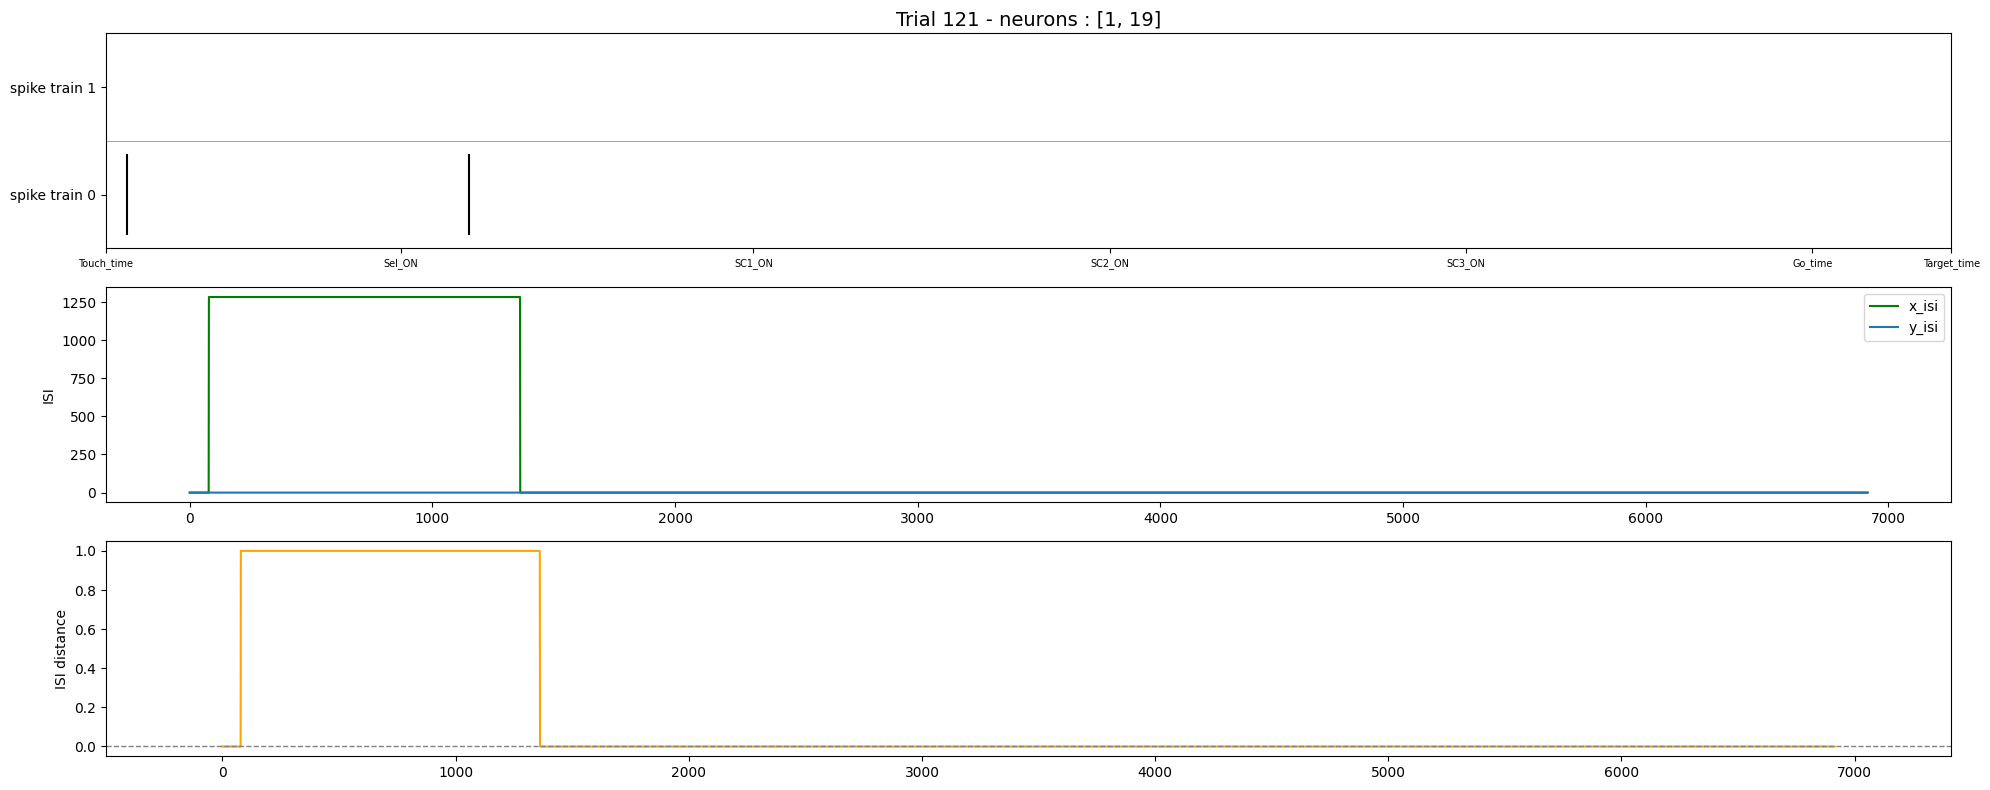

In [164]:
t = 121
neurons_ = [1,19]
event_vector = df_task_ts.loc[t]

fig, axs = plt.subplots(3,1, figsize=(20, 8))

# Parcourir tous les neurones et tracer leur spike train
for idx, n in enumerate(neurons_) :
    spiketrain = spikes_times_aligned[n][t]['spike_train']

    if len(spiketrain) > 0 and spiketrain[0] != 0:      
        axs[0].eventplot(spiketrain.magnitude, linelengths=0.75, lineoffsets=idx, color='black')
for i in range(len(neurons_) - 1):
    axs[0].hlines(i+0.5, xmin=event_vector.min(), xmax=event_vector.max(), colors='gray', linestyles='solid', linewidth=0.5)

# Définir les étiquettes de l'axe x et l'axe y
axs[0].set_xticks(event_vector.values)
axs[0].set_xticklabels(event_labels, fontsize=7)
axs[0].set_yticks(range(n_neurons))
axs[0].set_yticklabels([f"spike train {n}" for n in range(n_neurons)], fontsize=10)
axs[0].set_title(f"Trial {t} - neurons : {neurons_}", fontsize=14)

# Ajuster les limites des axes
axs[0].set_xlim(event_vector.min(), event_vector.max())
axs[0].set_ylim(-0.5, len(neurons_)-0.5)


x_isi_in_time = ISI.compute(spikes_times_aligned[neurons_[0]][t])
y_isi_in_time = ISI.compute(spikes_times_aligned[neurons_[1]][t]) 
ISI_distance_ = ISI.distance(x_isi_in_time, y_isi_in_time)


# Create a figure with two subplots
# Plot x_isi and y_isi in the first column
axs[1].plot(x_isi_in_time, color = 'green', label='x_isi')
axs[1].plot(y_isi_in_time, label='y_isi')
axs[1].set_ylabel('ISI', fontsize=10)
axs[1].legend()

# Plot isi_dist in the second column
axs[2].plot(ISI_distance_, color='orange')
axs[2].set_ylabel('ISI distance', fontsize=10)
axs[2].hlines(0, xmin=-500, xmax=ISI_distance_.shape[0]+ 500, colors='gray', linestyles='dashed', linewidth=1)
axs[2].set_xlim(-500, ISI_distance_.shape[0] + 500)  # Set x-axis limits

plt.tight_layout()

# ISI Interpolation

In [165]:
def get_max_length(n_trials, ISI_distance):
    time_ = np.zeros((n_trials), dtype=int)
    for t in range(n_trials): 
        time_[t] = ISI_distance[t].shape[1]
    max_length = np.max(time_)

    return max_length, time_

In [166]:
def interpolate_ISI_distance(ISI_distance,  max_length):
    len_trial = ISI_distance.shape[0]
    ISI_distance_interp_ = np.full(max_length, np.nan)
    ISI_distance_interp_[:len_trial] = ISI_distance
    return ISI_distance_interp_

def interpolate_X_isi(X_isi,  max_length):
    len_trial = X_isi.shape[0]
    X_isi_interp_ = np.full(max_length, np.nan)
    X_isi_interp_ = np.full(max_length, np.nan)
    X_isi_interp_[:len_trial] = X_isi
    return X_isi_interp_

In [168]:
X_isi[0][0].shape

(6923,)

In [171]:
max_length, time = get_max_length(n_trials, ISI_distance)
ISI_distance_interp = np.zeros((n_trials, max_length, n_pairs), dtype=np.float32)
X_isi_interp = np.zeros((n_trials, max_length, n_neurons), dtype=np.float32)


for t in range(n_trials):
        for p in range(n_pairs):
                ISI_distance_interp[t, :, p]  = interpolate_ISI_distance(ISI_distance[t][p], max_length)
        for n in range(n_neurons) : 
                X_isi_interp[t, :, n] = interpolate_X_isi(X_isi[t][n], max_length)
        

# ISI mean and std

In [29]:
ISI_dist_mean = np.mean(ISI_distance_interp, axis=0)
ISI_dist_std = np.std(ISI_distance_interp, axis=0)
ISI_dist_mean.shape

(7304, 903)

/tmp/ipykernel_6294/2564840247.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  event_time = event_vector[:] - event_vector[0]


Text(0, 0.5, 'ISI distance')

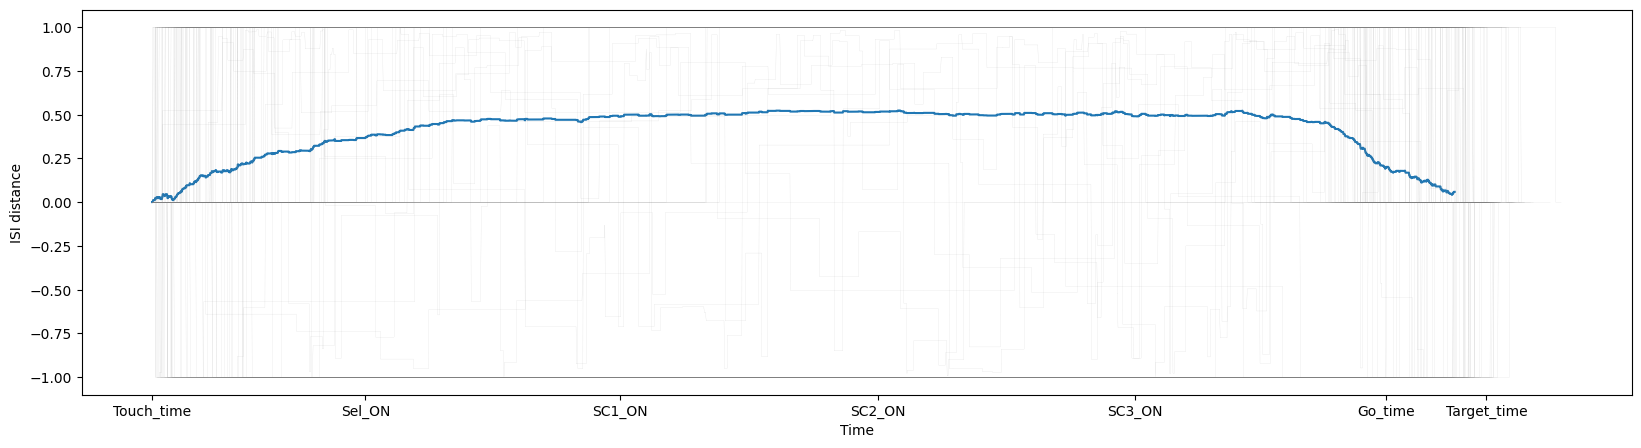

In [30]:
plt.figure(figsize=(20,5))
event_time = event_vector[:] - event_vector[0]

plt.plot(ISI_dist_mean[:,0].T)
plt.plot(ISI_distance_interp[:,:,0].T, linewidth=0.05, color='grey')
plt.xlabel('Time')
# Ajouter les étiquettes et les positions des événements sur l'axe des x
plt.xticks(event_time.values, labels=event_labels)
plt.ylabel('ISI distance')

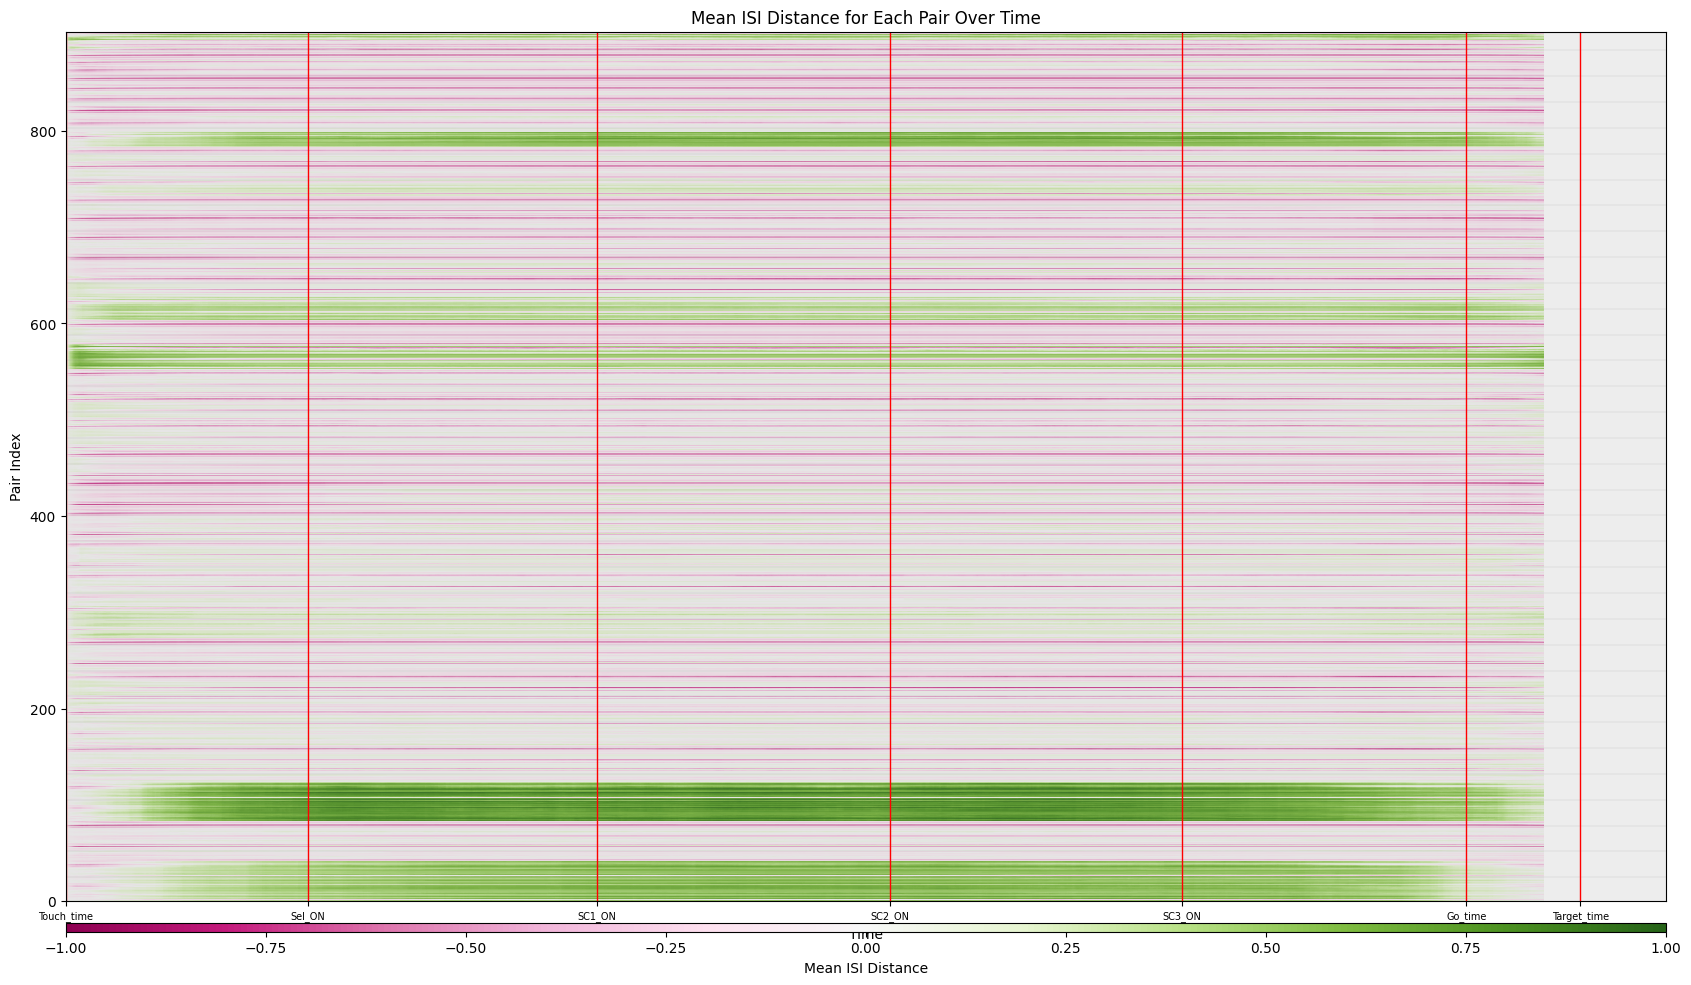

In [31]:

# Créer une disposition de sous-tracés

# Créer une disposition de sous-tracés avec des ratios de hauteur appropriés
fig, ax = plt.subplots(2, 1, figsize=(20, 10), gridspec_kw={'height_ratios': [100, 1]})

# Tracer le heatmap sur le premier sous-tracé
heatmap = ax[0].imshow(ISI_dist_mean.T, aspect='auto', cmap='PiYG', origin='lower', extent=[0, max_length, 0, n_pairs], vmin=-1, vmax=1)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Pair Index')
ax[0].set_title('Mean ISI Distance for Each Pair Over Time')

# Ajouter une ligne pour chaque paire sur le heatmap
for pair_index in range(n_pairs):
    ax[0].hlines(pair_index + 0.5, xmin=0, xmax=max_length, colors='gray', linestyles='solid', linewidth=0.1) 11

# Ajouter les lignes verticales pour chaque event_time
for event_time_point in event_time:
    ax[0].vlines(event_time_point, ymin=0, ymax=n_pairs, colors='red', linestyles='solid', linewidth=1)


# Ajouter les étiquettes et les positions des événements sur l'axe des x
ax[0].set_xticks(event_time.values)
ax[0].set_xticklabels(event_labels, fontsize=7)

# Ajouter la colorbar sur le deuxième sous-tracé
cbar = fig.colorbar(heatmap, cax=ax[1], orientation='horizontal')
cbar.set_label('Mean ISI Distance')
plt.subplots_adjust(top=0.9, bottom=0, left=0.1, right=0.9, hspace=0.05, wspace=0.2)
#plt.savefig('heatmap.png', dpi=300)
plt.show()


# Firing rate (fr) convolution

In [94]:
def binarize_spike_times(spikes_times_aligned):
    spikes_binarized = np.zeros((n_trials, max_length, n_neurons), dtype=float)
    for n in range(n_neurons):
        for t in range(n_trials):
            spiketrain = spikes_times_aligned[n][t]['spike_train']
            t_start = spikes_times_aligned[n][t]['t_start_ref'] 

            if len(spiketrain) > 0 and spiketrain[0] != 0:
                spk = spiketrain.magnitude - t_start
                spikes_binarized[t, spk, n] = 1 
            else : 
                spikes_binarized[t,:,n] = 0 
    
    return spikes_binarized
        
spikes_binarized = binarize_spike_times(spikes_times_aligned)

(176, 7304, 43)


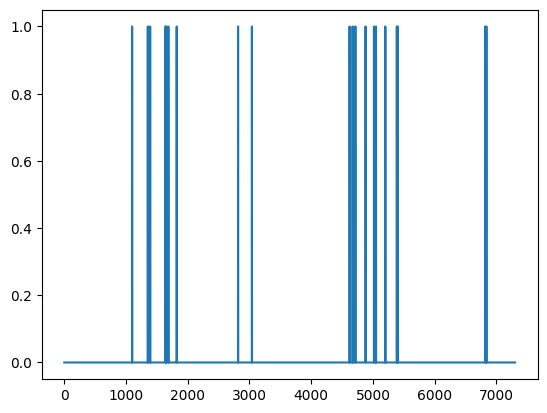

In [95]:
plt.plot(spikes_binarized[121,:,10])

In [123]:
def convolve_spike_binarized(spikes_binarized, sigma):
    n_sigma = len(sigma)
    delta_time = 1
    sigma_dt = sigma * delta_time 
    spike_convolved = np.zeros((n_trials, max_length, n_neurons, n_sigma))

    for idx, s in enumerate(sigma):
        scaling = sigma_dt[idx] * np.sqrt(2*np.pi)
        for t in range(n_trials) : 
            for n in range(n_neurons):
                smoothed_spk = spn.gaussian_filter1d(spikes_binarized[t,:,n], sigma_dt[idx]) * scaling
                spike_convolved[t,:,n,idx] = smoothed_spk
    
    return spike_convolved

In [124]:
sigma = [10, 50, 100]
spike_convolved = convolve_spike_binarized(spikes_binarized, sigma)

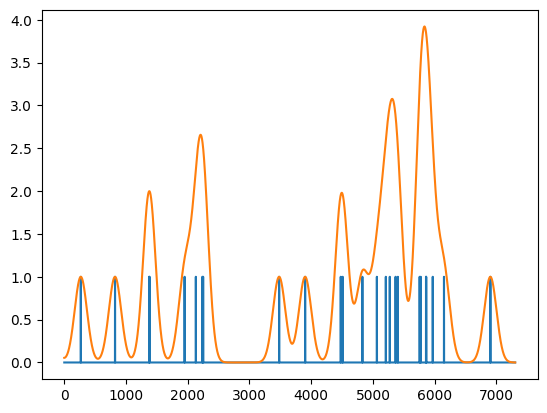

In [125]:
plt.plot(spikes_binarized[121,:,0])
plt.plot(spike_convolved[121,:,0,2])

# FR/ ISI corr

### option 2:  A travers tous les essais 

In [ ]:
vx = np.random.normal(size=[100,20])
vy = np.random.normal(size=[100,20])

vx -= vx.mean(keepdims=True)
vy -= vy.mean(keepdims=True)

cov_xy = np.einsum('kt, kt -> t', vx, vy)
var_x = np.einsum('kt, kt -> t', vx, vx)
var_y = np.einsum('kt, kt -> t', vy, vy)

corr_xy = cov_xy / np.sqrt( var_x * var_y )

print(corr_xy.shape)
print(corr_xy)

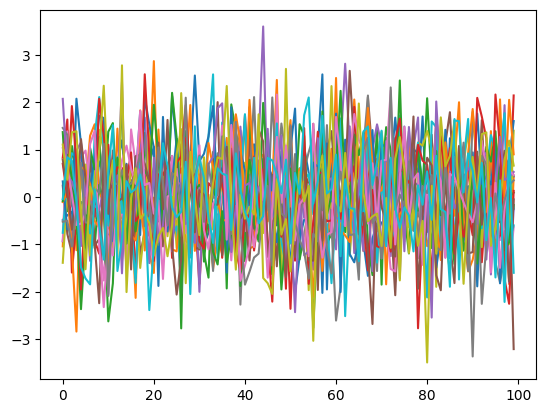

In [212]:
plt.plot(vx)

### option 1

In [ ]:
support_y = np.logical_not(np.isnan(y))

print(np.isnan(x[support_y]).any())
print(np.isnan(y[support_y]).any())

print(np.corrcoef(x[support_y], y[support_y]))
print(np.corrcoef(x, y))


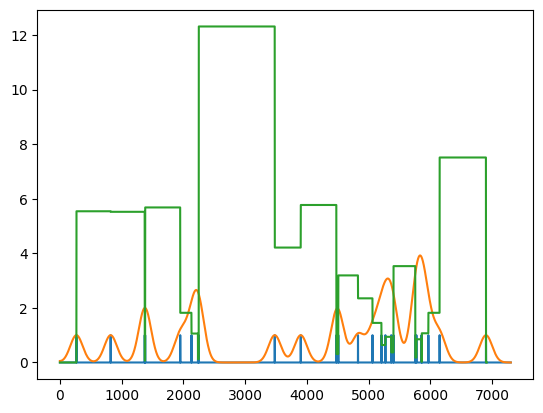

In [174]:
t = 121
n = 0
plt.plot(spikes_binarized[t,:,n])
plt.plot(spike_convolved[t,:,n,2])
plt.plot(X_isi_interp[t,:,n]/100)


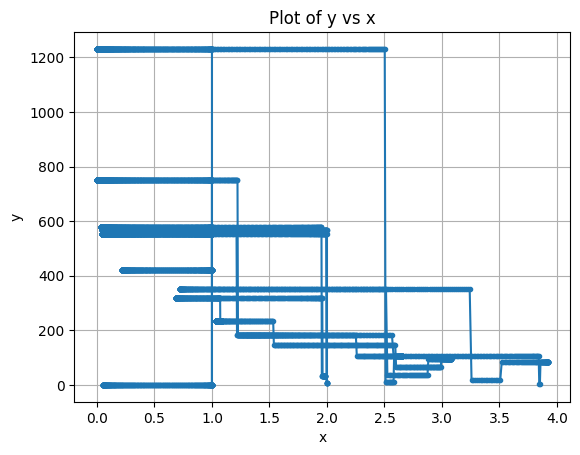

In [189]:
# Assuming you have two vectors x and y of the same length
# Replace these with your actual data 11
x = spike_convolved[t,:,n,2]
y = X_isi_interp[t,:,n]

# Plot y vs x
plt.plot(x, y, marker='.')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y vs x')

# Show the plot
plt.grid(True)
plt.show()


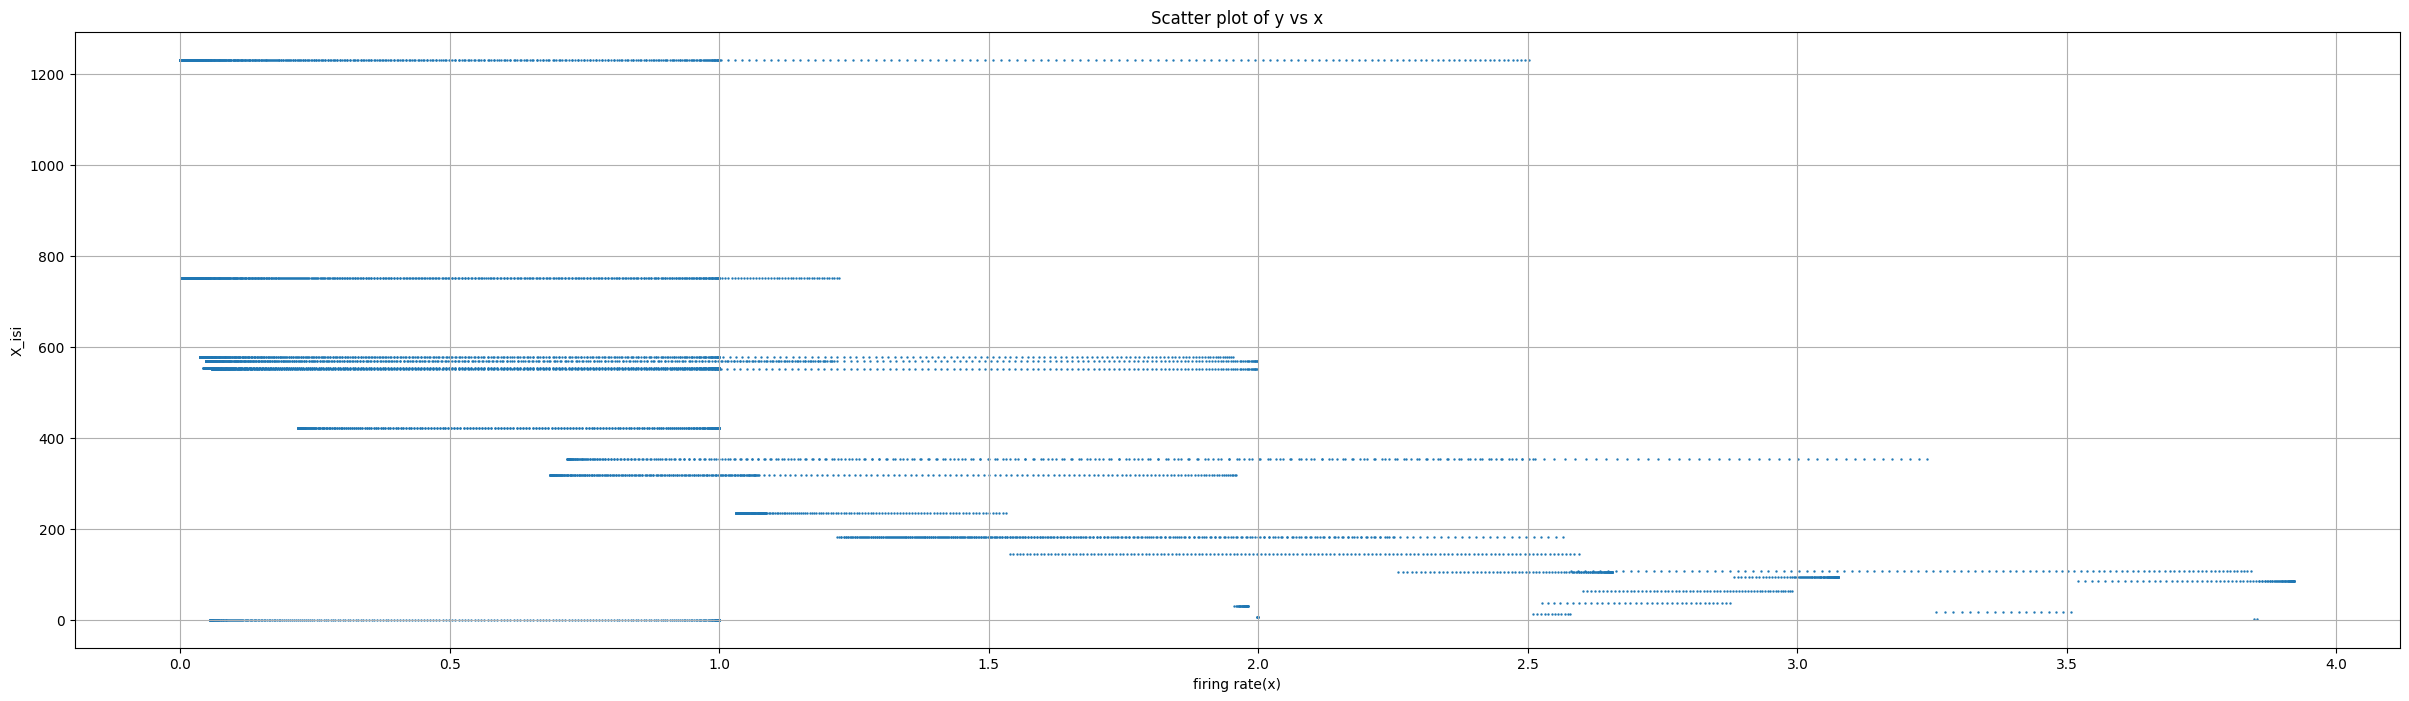

In [200]:
plt.figure(figsize=(30, 8))
x = spike_convolved[t,:,n,2]
y = X_isi_interp[t,:,n]
# Plot y vs x as a scatter plot
plt.scatter(x, y, s=0.5)

# Add labels and title
plt.xlabel('firing rate(x)')
plt.ylabel('X_isi')
plt.title('Scatter plot of y vs x')

# Show the plot
plt.grid(True)
plt.show()

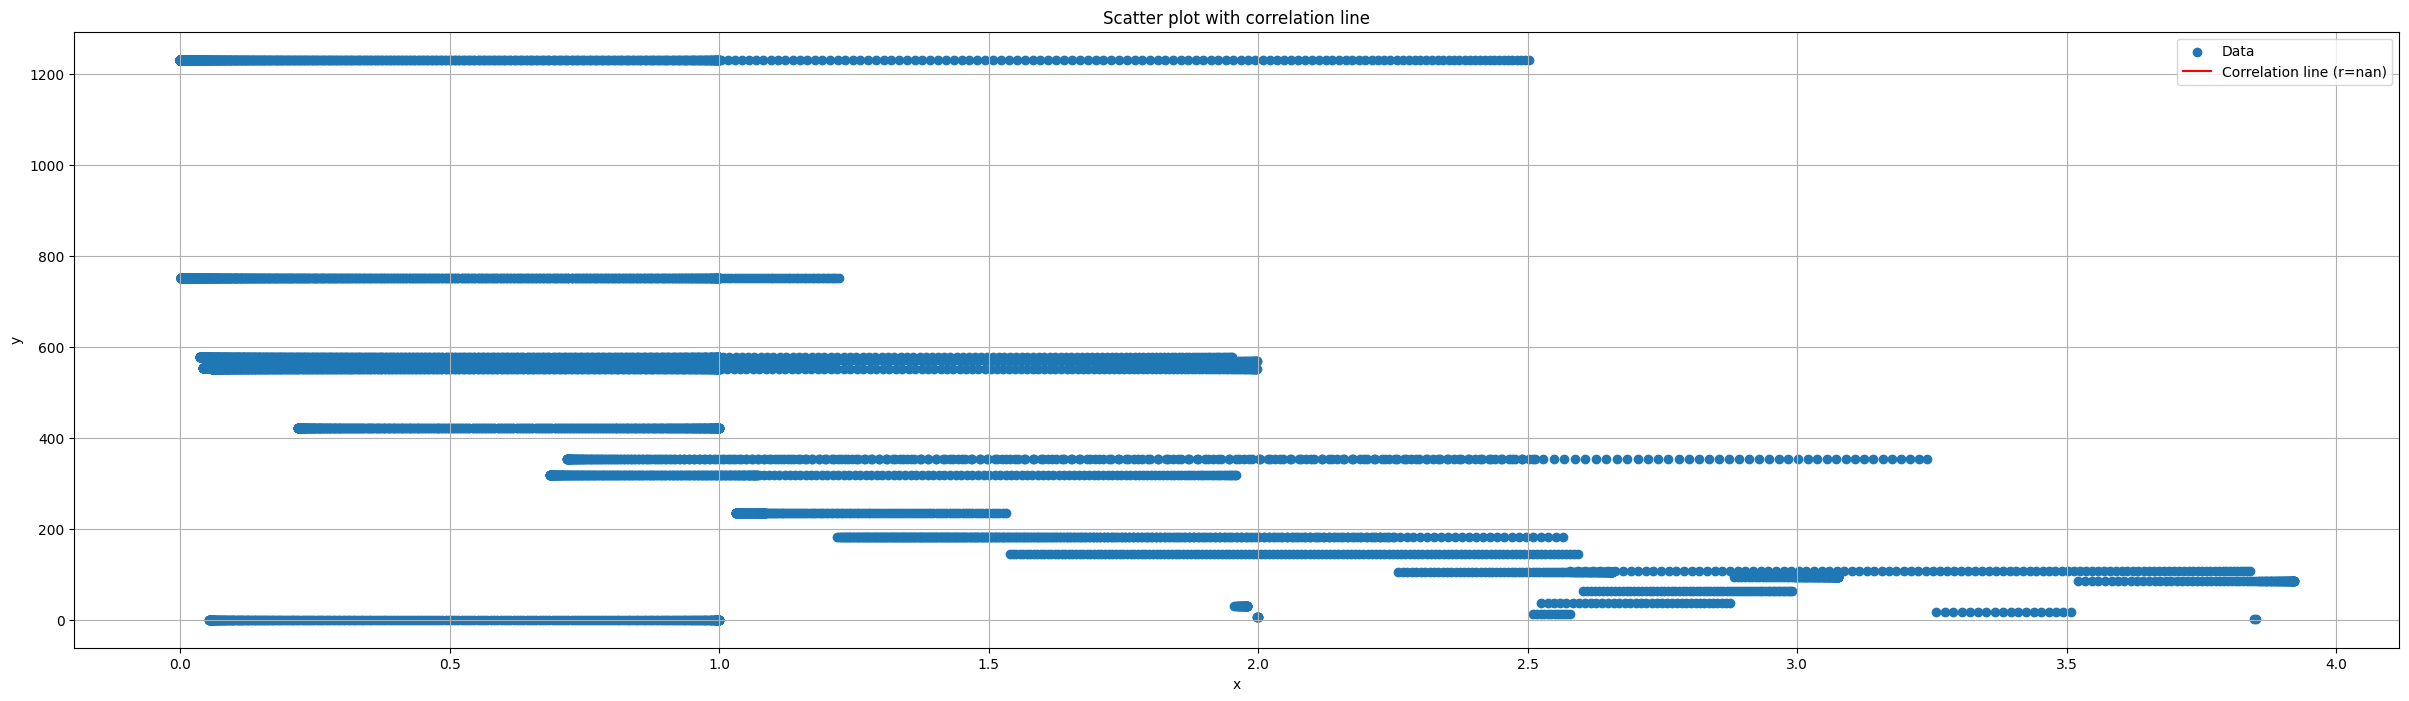

In [201]:
x = spike_convolved[t,:
vx = np.random.normal(size=[100,20])
vy = np.random.normal(size=[100,20])

vx -= vx.mean(keepdims=True)
vy -= vy.mean(keepdims=True)

cov_xy = np.einsum('kt, kt -> t', vx, vy)
var_x = np.einsum('kt, kt -> t', vx, vx)
var_y = np.einsum('kt, kt -> t', vy, vy)

corr_xy = cov_xy / np.sqrt( var_x * var_y )

print(corr_xy.shape)
print(corr_xy),n,2]
y = X_isi_interp[t,:,n]
# Calculate correlation 
vx = np.random.normal(size=[100,20])
vy = np.random.normal(size=[100,20])

vx -= vx.mean(keepdims=True)
vy -= vy.mean(keepdims=True)

cov_xy = np.einsum('kt, kt -> t', vx, vy)
var_x = np.einsum('kt, kt -> t', vx, vx)
var_y = np.einsum('kt, kt -> t', vy, vy)

corr_xy = cov_xy / np.sqrt( var_x * var_y )

print(corr_xy.shape)
print(corr_xy)
plt.title('Scatter plot with correlation line')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [236]:
data = np.zeros(n_trials, dtype=object)

for t in range(n_trials) : 
    df_trial = []
    for n_p, (r,c) in enumerate(zip(row, col)):
        I =  ISI_distance_interp[t,:,n_p]
        x = spike_convolved[t, :, r, 0]
        y = spike_convolved[t, :, c, 0]
        df = pd.DataFrame({f'I({r},{c})': I, f'{r}': x, f'{c}': y})
        df_trial.append(df)

    concatenated_df = pd.concat(df_trial, axis=1)
    data[t] = concatenated_df

In [237]:
data[0]

,"I(0,1)",0,1,"I(0,2)",0,2,"I(0,3)",0,3,"I(0,4)",...,42,"I(40,41)",40,41,"I(40,42)",40,42,"I(41,42)",41,42
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.004887,0.0,0.0,0.0,0.0,2.004887,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.997710,0.0,0.0,0.0,0.0,1.997710,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.983613,0.0,0.0,0.0,0.0,1.983613,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.963097,0.0,0.0,0.0,0.0,1.963097,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.0,0.0,1.936869,0.0,0.0,0.0,1.0,1.936869,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7299,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,...,0.0,NaN,0.0,0.000000,NaN,0.0,0.0,NaN,0.000000,0.0
7300,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,...,0.0,NaN,0.0,0.000000,NaN,0.0,0.0,NaN,0.000000,0.0
7301,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,...,0.0,NaN,0.0,0.000000,NaN,0.0,0.0,NaN,0.000000,0.0
7302,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,...,0.0,NaN,0.0,0.000000,NaN,0.0,0.0,NaN,0.000000,0.0


In [253]:
n0 = 0
n1 = 1

corr_coef = data[0].iloc[:,:3].corr(method='spearman')
corr_coef.iloc[0,1]
corr_coef

,"I(0,1)",0,1
"I(0,1)",1.00000,0.32471,NaN
0,0.32471,1.00000,NaN
1,NaN,NaN,NaN


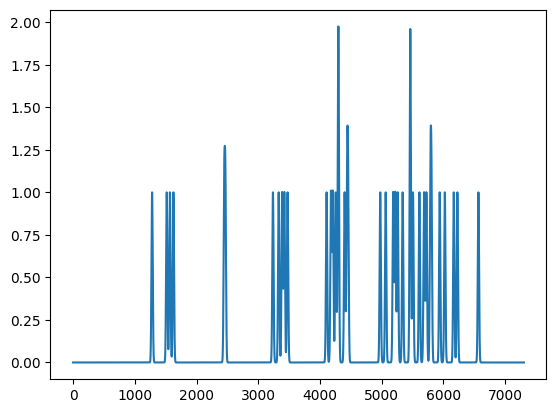

In [251]:
plt.plot(spike_convolved[0,:,0, 0])